In [1]:
import cv2
import numpy as np

In [2]:
img = cv2.imread('A2.jpeg')

In [3]:
cv2.namedWindow('Image', cv2.WINDOW_NORMAL)
cv2.resizeWindow('Image', img.shape[1], img.shape[0])
cv2.imshow('Image', img) 
cv2.waitKey(0)                                         # Wait for any key
cv2.destroyAllWindows()

# 1. Resize image by 0.5x and 2x.

In [4]:
small = cv2.resize(img, None, fx=0.5, fy=0.5)
large = cv2.resize(img, None, fx=2.0, fy=2.0)

In [5]:
cv2.namedWindow('0.5x img', cv2.WINDOW_NORMAL)         
cv2.resizeWindow('0.5x img', small.shape[1], small.shape[0])
cv2.imshow('0.5x img', small) 
cv2.waitKey(0)                                         # Wait for any key
cv2.destroyAllWindows()  

In [6]:
cv2.namedWindow('2x img', cv2.WINDOW_NORMAL)         
cv2.resizeWindow('2x img', large.shape[1], large.shape[0])
cv2.imshow('2x img', large) 
cv2.waitKey(0)                                         # Wait for any key
cv2.destroyAllWindows()  

# 2. Rotate Image by 45° Around Center

In [7]:
(h, w) = img.shape[:2]
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, 45, 1.0)
rotated = cv2.warpAffine(img, M, (w, h))

In [8]:
cv2.namedWindow('rotated img', cv2.WINDOW_NORMAL)         
cv2.resizeWindow('rotated img', rotated.shape[1], rotated.shape[0])
cv2.imshow('rotated img', large) 
cv2.waitKey(0)                                         # Wait for any key
cv2.destroyAllWindows() 

In [9]:
import matplotlib.pyplot as plt

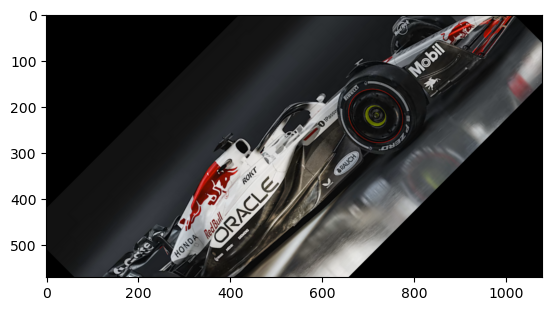

In [11]:
plt.imshow(rotated[:, :, ::-1])

# 3. Translate Image Right by 100px and Down by 50px

In [12]:
M = np.float32([[1, 0, 100], [0, 1, 50]])
shifted = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))

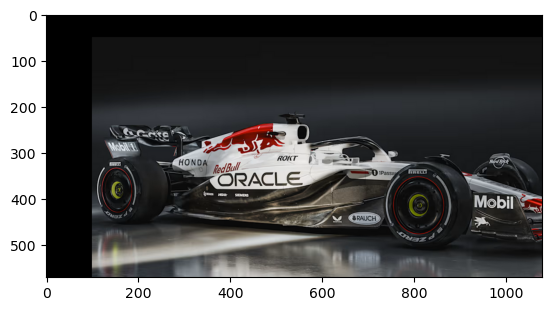

In [14]:
plt.imshow(shifted[:, :, ::-1])

# 4. Flip Image Horizontally, Vertically, and Both

In [15]:
flip_horizontal = cv2.flip(img, 1)   # left-right
flip_vertical = cv2.flip(img, 0)     # top-bottom
flip_both = cv2.flip(img, -1)        # both

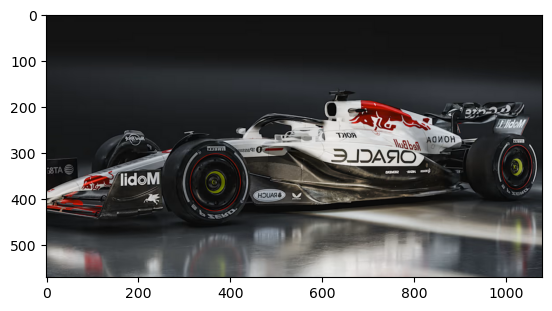

In [17]:
plt.imshow(flip_horizontal[:, :, ::-1])

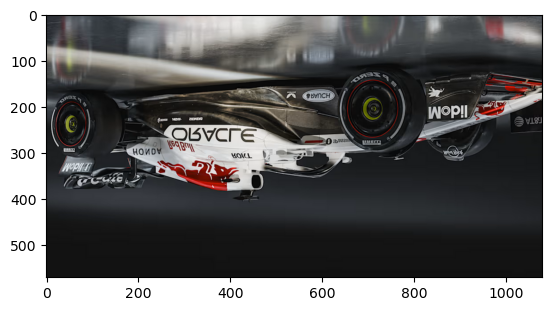

In [18]:
plt.imshow(flip_vertical[:, :, ::-1])

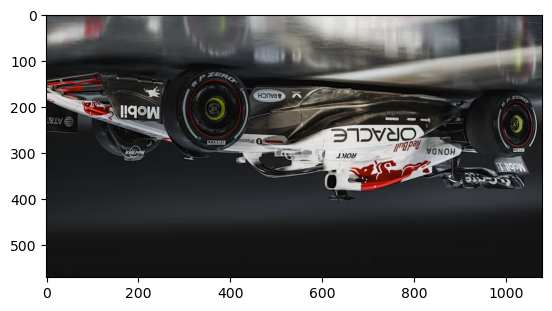

In [19]:
plt.imshow(flip_both[:, :, ::-1])

# 5. Crop Region (100:200, 150:250)

In [20]:
cropped = img[100:200, 150:250]

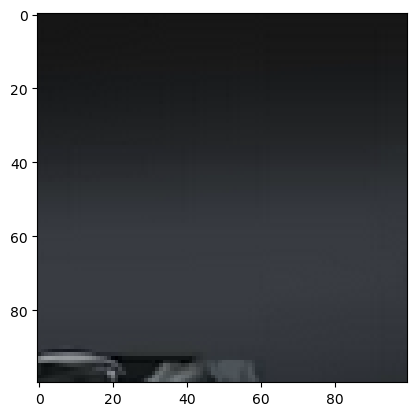

In [21]:
plt.imshow(cropped[:, :, ::-1])

# 6. Paste Cropped Region onto Another Area

In [22]:
img_c = img.copy()

In [23]:
img_c[0:100, 0:100] = cropped

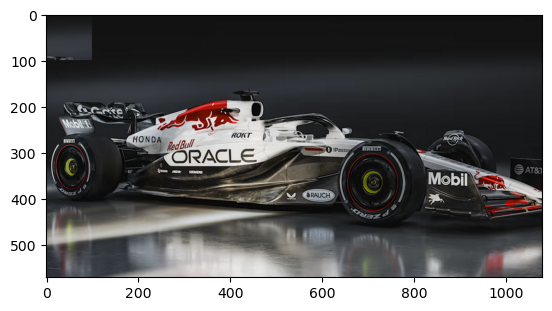

In [24]:
plt.imshow(img_c[:, :, ::-1])

# 7. Reusable Function for Rotation and Translation

In [25]:
def rotate_and_translate(img, angle, dx, dy):
    (h, w) = img.shape[:2]
    center = (w // 2, h // 2)
    M_rot = cv2.getRotationMatrix2D(center, angle, 1.0)
    M_rot[0, 2] += dx
    M_rot[1, 2] += dy
    return cv2.warpAffine(img, M_rot, (w, h))

In [26]:
mod = rotate_and_translate(img, 69, 50, -80)

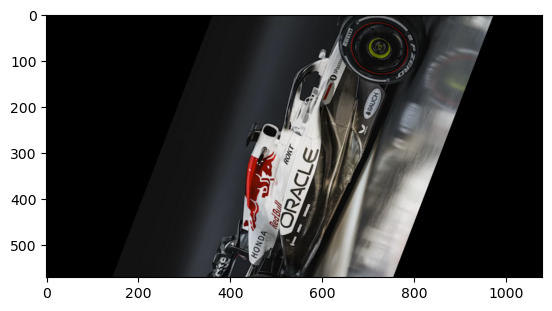

In [27]:
plt.imshow(mod[:, :, ::-1])